<a href="https://colab.research.google.com/github/naminda/hello-world/blob/master/capstone_15th_july_8_SupervisedMachineLearning_Classification_naminda_FOR_CAR_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning - Classification
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

In [ ]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier #KNN

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

## Load Data

In [ ]:
# From URL (GitHub raw file link)
file_path_url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'


# Load CSV File
car_data = pd.read_csv(file_path_url)
car_data.head(5)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Rename column names

In [ ]:
car_data.columns =['price','maint','doors','persons','boot_size','safety','likelyhood']
car_data.describe(include='all').transpose()

,count,unique,top,freq
price,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
boot_size,1727,3,med,576
safety,1727,3,med,576
likelyhood,1727,4,unacc,1209


In [ ]:
car_data.sample(5)

,price,maint,doors,persons,boot_size,safety,likelyhood
1501,low,high,5more,4,big,high,vgood
966,med,vhigh,5more,more,med,med,acc
1055,med,high,5more,2,med,low,unacc
166,vhigh,high,4,2,med,high,unacc
775,high,low,2,more,small,high,unacc


In [ ]:
car_data['persons'].unique()
 

array(['2', '4', 'more'], dtype=object)

In [ ]:
car_data['persons'].value_counts

<bound method IndexOpsMixin.value_counts of 0          2
1          2
2          2
3          2
4          2
        ... 
1722    more
1723    more
1724    more
1725    more
1726    more
Name: persons, Length: 1727, dtype: object>

In [ ]:
car_data.head()

,price,maint,doors,persons,boot_size,safety,likelyhood
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## Pre-processing Data

check duplicates

In [ ]:
duplicates = car_data[car_data.duplicated()]
duplicates

,price,maint,doors,persons,boot_size,safety,likelyhood


In [ ]:
price = pd.get_dummies(car_data.price)
maint = pd.get_dummies(car_data.maint)
doors = pd.get_dummies(car_data.doors)
boot_size = pd.get_dummies(car_data.boot_size)
safety = pd.get_dummies(car_data.safety)

safety.sample()

,high,low,med
1639,1,0,0


In [ ]:
test_result = pd.concat([test_result, price], join='outer', axis=1)

NameError: ignored

In [ ]:
car_data['y_act'].describe()

KeyError: ignored

In [ ]:

car_data.sample(5)

,price,maint,doors,persons,boot_size,safety,likelyhood
155,vhigh,high,3,more,med,low,unacc
1322,low,vhigh,3,2,small,low,unacc
850,high,low,5more,4,med,high,acc
654,high,med,2,2,big,med,unacc
1513,low,med,2,2,small,high,unacc


In [ ]:
car_data['persons'].value_counts


<bound method IndexOpsMixin.value_counts of 0          2
1          2
2          2
3          2
4          2
        ... 
1722    more
1723    more
1724    more
1725    more
1726    more
Name: persons, Length: 1727, dtype: object>

In [ ]:
car_data.value_counts

<bound method DataFrame.value_counts of       price  maint  doors persons boot_size safety likelyhood
0     vhigh  vhigh      2       2     small    med      unacc
1     vhigh  vhigh      2       2     small   high      unacc
2     vhigh  vhigh      2       2       med    low      unacc
3     vhigh  vhigh      2       2       med    med      unacc
4     vhigh  vhigh      2       2       med   high      unacc
...     ...    ...    ...     ...       ...    ...        ...
1722    low    low  5more    more       med    med       good
1723    low    low  5more    more       med   high      vgood
1724    low    low  5more    more       big    low      unacc
1725    low    low  5more    more       big    med       good
1726    low    low  5more    more       big   high      vgood

[1727 rows x 7 columns]>

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   price      1727 non-null   int64 
 1   maint      1727 non-null   int64 
 2   doors      1727 non-null   object
 3   persons    1727 non-null   object
 4   boot_size  1727 non-null   int64 
 5   safety     1727 non-null   int64 
 6   car        1727 non-null   object
 7   y_act      1727 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 108.1+ KB


In [ ]:
convert_dict = {'doors': int,
                'persons': int
                }
car_data = car_data.astype(convert_dict) 
car_data.info()              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   price      1727 non-null   int64 
 1   maint      1727 non-null   int64 
 2   doors      1727 non-null   int64 
 3   persons    1727 non-null   int64 
 4   boot_size  1727 non-null   int64 
 5   safety     1727 non-null   int64 
 6   car        1727 non-null   object
 7   y_act      1727 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 108.1+ KB


In [ ]:
# Assign numbers to class labels
#data['y_act'] = data['class']
##data['y_act'].replace('Iris-setosa', 0, inplace=True)
#data['y_act'].replace('Iris-versicolor', 1, inplace=True)
#data['y_act'].replace('Iris-virginica', 2, inplace=True)

#data.sample(5)

convert class to numerical value eg: setosa as 0

this is not ordinal categorical variable ? it is a nominal categorical variable? ,
it donest have a rank.  just a number .

## Finding Corelation

In [ ]:
car_data.columns

Index(['price', 'maint', 'doors', 'persons', 'boot_size', 'safety', 'car',
       'y_act'],
      dtype='object')

,price,maint,doors,persons,boot_size,safety,y_act
price,1.000000,-0.001043,0.001043,0.001039,0.000952,0.000952,-0.282488
maint,-0.001043,1.000000,0.001043,0.001039,0.000952,0.000952,-0.232128
doors,0.001043,0.001043,1.000000,-0.001039,-0.000952,-0.000952,0.065662
persons,0.001039,0.001039,-0.001039,1.000000,-0.000949,-0.000949,0.373253
boot_size,0.000952,0.000952,-0.000952,-0.000949,1.000000,-0.000869,0.157617
safety,0.000952,0.000952,-0.000952,-0.000949,-0.000869,1.000000,0.439171
y_act,-0.282488,-0.232128,0.065662,0.373253,0.157617,0.439171,1.000000


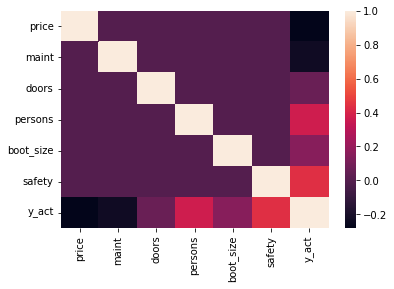

In [ ]:
correlation_matrix = car_data[['price', 'maint', 'doors', 'persons', 'boot_size','safety','y_act']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

In [ ]:
car_data.columns

Index(['price', 'maint', 'doors', 'persons', 'boot_size', 'safety', 'car',
       'y_act'],
      dtype='object')

In [ ]:
#correlation_matrix = data[['sepal length', 'sepal width', 'petal length', 'petal width', 'y_act']].corr()

#sns.heatmap(correlation_matrix)
#correlation_matrix

In [ ]:
# Would you remove any feature based on corelation matrix?

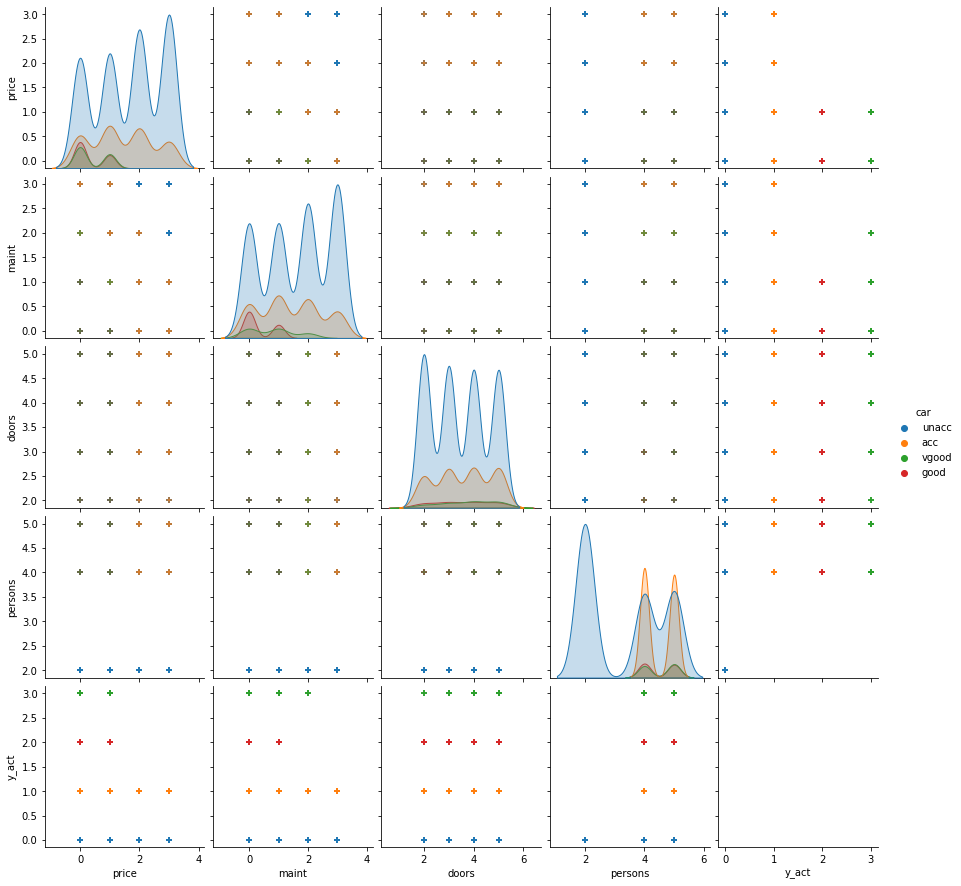

In [ ]:
g = sns.pairplot(car_data, hue='car', markers='+')
plt.show()

pairplot giev good undersan on correation

## Identify `X` and `y`

In [ ]:
X_variables = ['price', 'maint', 'doors','persons']
car_data[X_variables].head()

,price,maint,doors,persons
0,3,3,2,2
1,3,3,2,2
2,3,3,2,2
3,3,3,2,2
4,3,3,2,2


dropped sepal width just as experiment. pertal with and petal linght has high correlation.

In [ ]:
y_varibale = 'y_act'
car_data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

convert to one dimen numpy arraye

In [ ]:
# Three classes (y variable)
car_data[y_varibale].unique()

array([0, 1, 3, 2])

In [ ]:
class_names

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
X = car_data[X_variables].values
X[:5]

array([[3, 3, 2, 2],
       [3, 3, 2, 2],
       [3, 3, 2, 2],
       [3, 3, 2, 2],
       [3, 3, 2, 2]])

convert to numpy array

In [ ]:
y = car_data[y_varibale].values
y[:5]

array([0, 0, 0, 0, 0])

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 1208
Test sample size  = 519


## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
model = LogisticRegression()

## Train Model (use Training dataset)

In [ ]:
model.fit(X_train, y_train)
# Removed the festure "sepal width".

DecisionTreeClassifier(max_depth=10, random_state=0)

## Predict (use Testing dataset)

In [ ]:

class_names

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
# Probability
model.predict_proba(X_test)[:5]

array([[1.        , 0.        , 0.        , 0.        ],
       [0.42857143, 0.57142857, 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.375     , 0.375     , 0.        , 0.25      ],
       [0.25      , 0.125     , 0.375     , 0.25      ]])

three classes and three probabailities. first row total is one.
what is the class for first row. this is multilclass clasification for three clases. 
each class have a probability ..

In [ ]:
# Predicted Class
model.predict(X_test)[:5]

array([0, 1, 0, 0, 2])

skytic lean modle give predicted class. first row 2 second row 1.  
sometimes dont rely on these predicted class. 

## Predicted Probabilities of all three classes

In [ ]:
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]
y_pred_prob_3 = model.predict_proba(X_test)[:, 3]

# class 0 probability
y_pred_prob_0

array([1.        , 0.42857143, 1.        , 0.375     , 0.25      ,
       0.42857143, 1.        , 1.        , 0.        , 1.        ,
       0.5       , 1.        , 0.57142857, 0.25      , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.28571429,
       0.25      , 0.28571429, 0.6       , 1.        , 0.5       ,
       0.8       , 1.        , 1.        , 1.        , 0.6       ,
       1.        , 1.        , 1.        , 0.2       , 1.        ,
       1.        , 0.        , 0.25      , 0.71428571, 0.16666667,
       0.57142857, 0.66666667, 1.        , 0.25      , 0.375     ,
       0.25      , 1.        , 1.        , 0.33333333, 1.        ,
       1.        , 1.        , 1.        , 0.375     , 1.        ,
       0.        , 1.        , 0.6       , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.375     , 1.        , 0.57142857, 0.5       , 0.42857143,
       0.42857143, 0.66666667, 1.        , 1.        , 1.     

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

## Create Results Data Frame for Test Sample

In [ ]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2,'y_pred_prob_3':y_pred_prob_3})
test_result.sample(10)

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3
38,0,0,0.714286,0.285714,0.000000,0.000000
63,0,0,1.000000,0.000000,0.000000,0.000000
506,1,0,0.500000,0.500000,0.000000,0.000000
362,1,0,0.500000,0.333333,0.000000,0.166667
290,2,0,0.285714,0.142857,0.285714,0.285714
394,0,0,0.500000,0.500000,0.000000,0.000000
439,0,0,0.500000,0.500000,0.000000,0.000000
70,3,0,0.428571,0.428571,0.000000,0.142857
200,0,0,1.000000,0.000000,0.000000,0.000000
223,1,0,0.600000,0.400000,0.000000,0.000000


In [ ]:
#one-hot encode prediction column
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3,y_pred_0,y_pred_1,y_pred_2
0,0,0,1.000000,0.000000,0.000,0.00,1,0,0
1,0,1,0.428571,0.571429,0.000,0.00,0,1,0
2,0,0,1.000000,0.000000,0.000,0.00,1,0,0
3,1,0,0.375000,0.375000,0.000,0.25,1,0,0
4,0,2,0.250000,0.125000,0.375,0.25,0,0,1


use predicted prob to decie the class rather than using predic funtion for class

## Confusion Matrix

In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,291,52,18,361
1,88,27,3,118
2,9,2,6,17
3,12,3,8,23
All,400,84,35,519


only 3 false predictions.  17 an 11 and 14 are correct predctionx.  42/45 is the accracy. this accuracy 93%.

In [ ]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1] + cfm.loc[2,2]) / cfm.loc['All','All'] 
acuracy

0.6242774566473989

same results

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_lgr

0.6002974168940463

# Decision Tree Classifier
* Use same training and testing datasets

In [ ]:
# Create model object
model = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

decion tree clasifier can convert to decision tree.  
nX DEPTH HOW depth ypu need to go down,

## Visualize Decision Tree

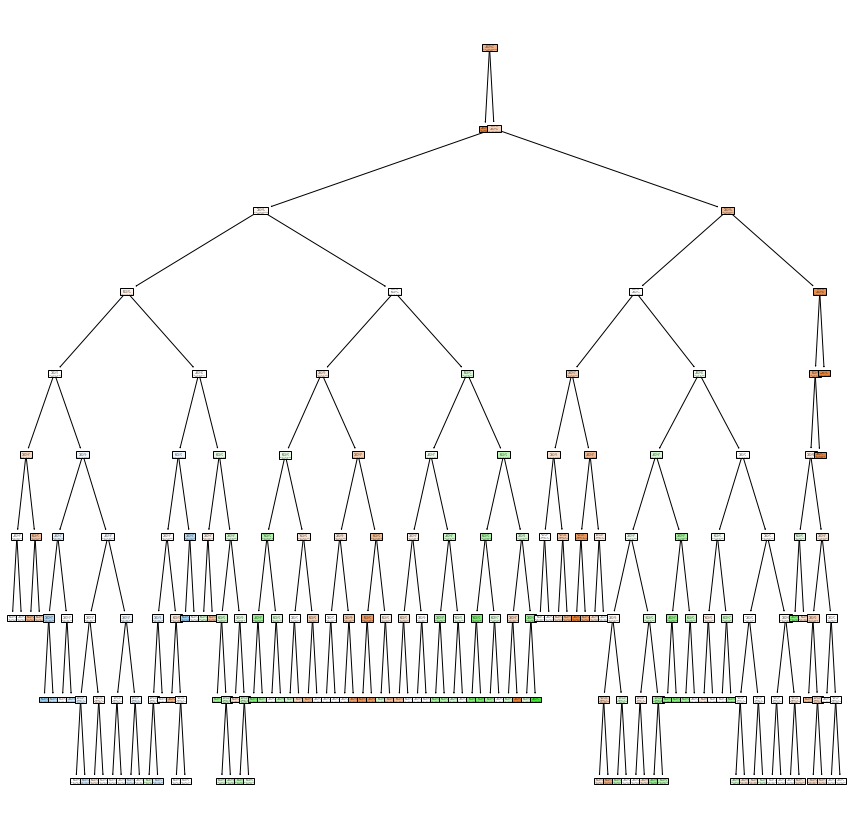

In [ ]:
pfig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=X_variables, class_names=class_names, filled=True)
plt.show()

end of the day 10th june 

In [ ]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
0,0,0,1.000000,0.000000,0.000,1,0,0
1,0,1,0.428571,0.571429,0.000,0,1,0
2,0,0,1.000000,0.000000,0.000,1,0,0
3,1,0,0.375000,0.375000,0.000,1,0,0
4,0,2,0.250000,0.125000,0.375,0,0,1


predict prob and predict function skytic model 

In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,291,52,18,361
1,88,27,3,118
2,9,2,6,17
3,12,3,8,23
All,400,84,35,519


In [ ]:
# tc = Tree classifer
acuracy_tc = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_tc

0.6242774566473989

In [ ]:
f1_score_tc = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_tc

0.6002974168940463

# Random Forest Classifier

In [ ]:
# Create model object
model = RandomForestClassifier(random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
0,0,0,1.000000,0.000000,0.000000,1,0,0
1,0,1,0.413378,0.586622,0.000000,0,1,0
2,0,0,1.000000,0.000000,0.000000,1,0,0
3,1,0,0.384158,0.359315,0.000000,1,0,0
4,0,2,0.277643,0.118721,0.355912,0,0,1


In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,279,64,18,361
1,74,40,4,118
2,9,2,6,17
3,8,6,9,23
All,370,112,37,519


In [ ]:
# rf = Random Forest classifer
acuracy_rf = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_rf

0.626204238921002

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_rf = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_rf

0.6173145193040683

# Support Vector Machines
* https://en.wikipedia.org/wiki/Support-vector_machine
* https://scikit-learn.org/stable/modules/svm.html

In [ ]:
# Create model object
model = svm.SVC(kernel='linear', C=1.0, probability=True)

# Train Model
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0
0,0,0,0.712455,0.245006,0.022167,1
1,0,0,0.723656,0.233131,0.022544,1
2,0,0,0.706220,0.251603,0.021969,1
3,1,0,0.705240,0.221882,0.035200,1
4,0,0,0.688941,0.157610,0.084536,1


In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,All
y_act,,
0,361,361
1,118,118
2,17,17
3,23,23
All,519,519


In [ ]:
acuracy_svm = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_svm

0.6955684007707129

In [ ]:
f1_score_svm = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_svm

0.5706822560868805

# K-Neighbors Classifier
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [ ]:
# Create model object
model = KNeighborsClassifier(n_neighbors=5)

# Train Model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2,y_pred_3
0,0,0,1.0,0.0,0.0,1,0,0,0
1,0,1,0.2,0.8,0.0,0,1,0,0
2,0,0,1.0,0.0,0.0,1,0,0,0
3,1,1,0.2,0.4,0.0,0,1,0,0
4,0,0,0.4,0.2,0.4,1,0,0,0


In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,3,All
y_act,,,,,
0,281,66,13,1,361
1,75,41,2,0,118
2,7,4,4,2,17
3,13,2,8,0,23
All,376,113,27,3,519


In [ ]:
acuracy_knn = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_knn

0.628131021194605

In [ ]:
f1_score_knn = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_knn

0.6170697945350694

<hr>
Last update 2021-10-16 by Sumudu Tennakoon